# Step 1 : Objective


1.   build a predictive model to predict if an applicant is able to repay the lending company or not




##Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Step 2: Data gathering

In [2]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/Data_set/train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# ! pip install dtale

# import dtale
# import dtale.app as dtale_app
# dtale_app.USE_COLAB = True
# dtale.show(train)


#add after any code taken from dtale
# figure.show(renderer="colab")

In [4]:
test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/Data_set/test.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
# making copy of orignal data
train_orignal=train.copy()
test_orignal=test.copy()

In [6]:
#display columns
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# 12 independent variables and 1 target variable, i.e. Loan_Status in the training dataset.

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
#same as train dataset expect for Loan_Status

#Step 3:-EDA

# 1.Univariate Analysis

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# we can see there are 3 types of data types
# 1) object(categorical):-Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
# 2) int64(integer variable):- ApplicantIncome
# 3)float64(decimal values):- CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History

In [12]:
train.shape

(614, 13)

In [13]:
# we have 614 rows and 13 columns in tarin dataset

In [14]:
test.shape

(367, 12)

In [15]:
# we have 367 rows and 12 columns in test dataset

In [16]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# Normalize can be set to True to print proportions instead of number
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

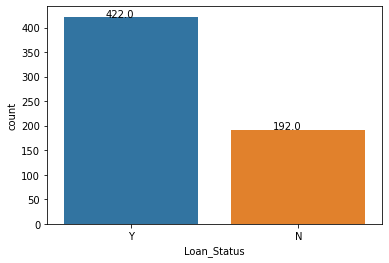

In [18]:
ax=sns.countplot(train['Loan_Status'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [19]:
# The loan of 422(around 69%) people out of 614 were approved.

##Independent Variable (Categorical)

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

In [20]:
a=['Gender', 'Married', 'Self_Employed','Credit_History']

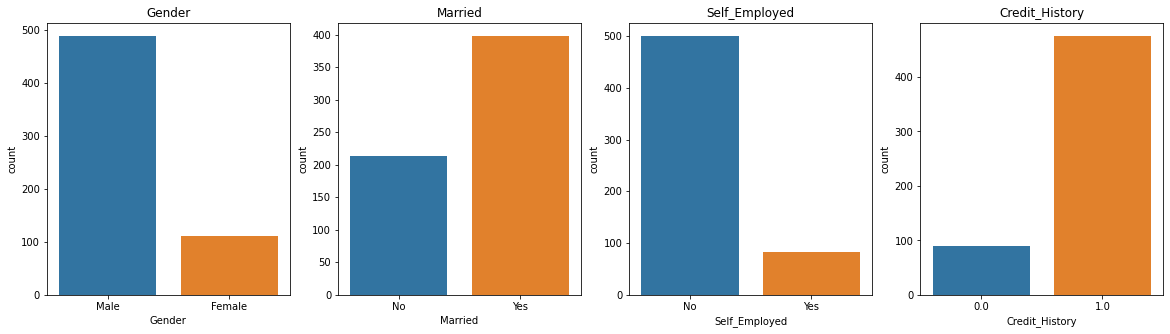

In [21]:
# count Plot of each columns 
fig, axes = plt.subplots(ncols=4, nrows=1,figsize=(20,5))
for ax,col in zip(axes.ravel(),a):
  sns.countplot(train[col], ax=ax).set(title=col)
plt.show()

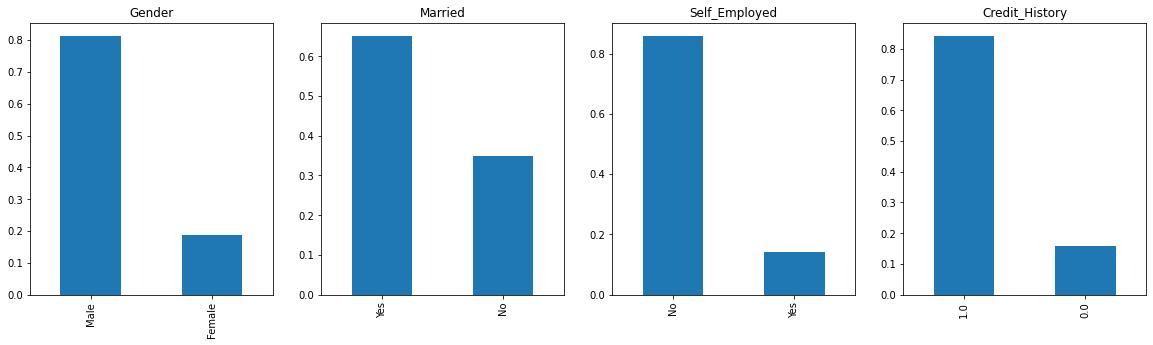

In [22]:
fig, axes = plt.subplots(ncols=4, nrows=1,figsize=(20,5))
for ax,col in zip(axes.ravel(),a):
 train[col].value_counts(normalize=True).plot.bar(title=col,ax=ax)
plt.show()

In [23]:
# from above plot
# 1) 80 % of applicants in dataset are male
# 2) 65% of applicant are marid
# 3) 15 % of applicant are self-employed
# 4) 85 % of applicant repay their doubts

##Independent Variable (Ordinal)
Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

In [24]:
a=['Dependents','Education','Property_Area']

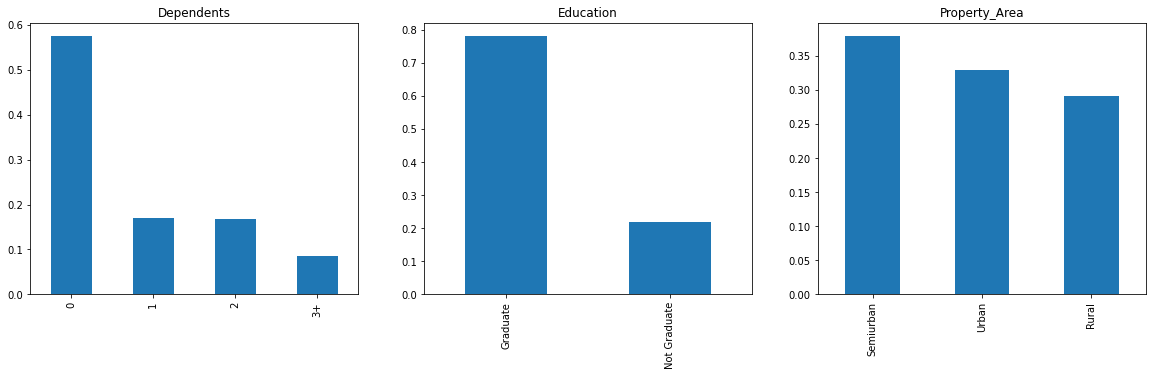

In [25]:
fig, axes = plt.subplots(ncols=3, nrows=1,figsize=(20,5))
for ax,col in zip(axes.ravel(),a):
  train[col].value_counts(normalize=True).plot.bar(title=col,ax=ax)
plt.show()

In [26]:
# 1) most of applicant dont have any dependents
# 2) 80 % of applicant ar egraduate 
# 3) most are from semiurban area

##Independent Variable (Numerical)
Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

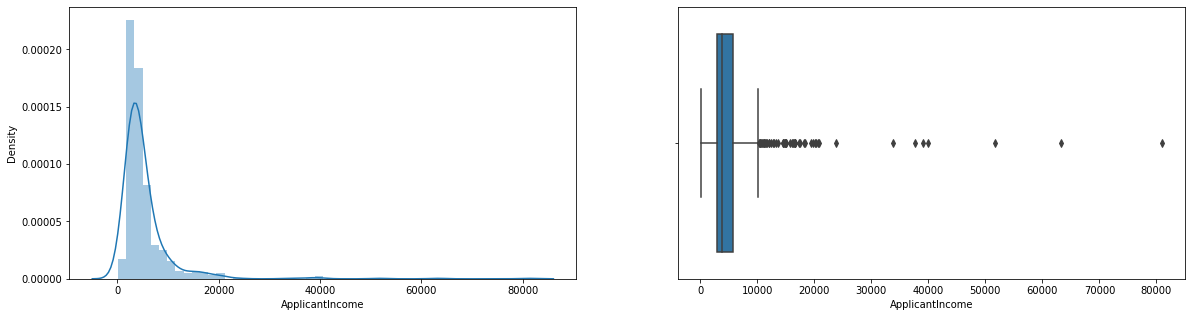

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(train['ApplicantIncome'],ax=axes[0])
sns.boxplot(train['ApplicantIncome'],ax=axes[1])
plt.show()

In [28]:
# most of data is left skewed 
# lots of outlier/extreme values present

In [29]:
# sns.displot(train['ApplicantIncome'],kde=True,height=5,aspect=2)

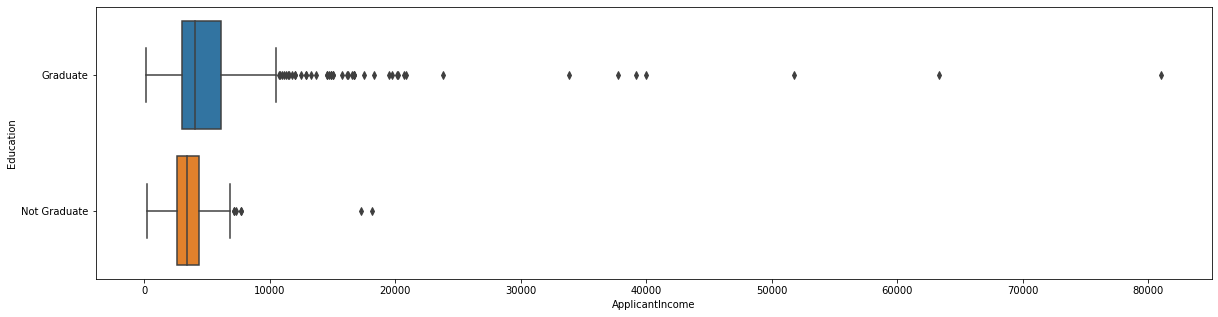

In [30]:
# boxplot on basis of education and income
plt.figure(figsize=(20,5))
sns.boxplot(x='ApplicantIncome',y='Education',data=train)

In [31]:
#we can see that graduates with high income ,which are appering to be outlier

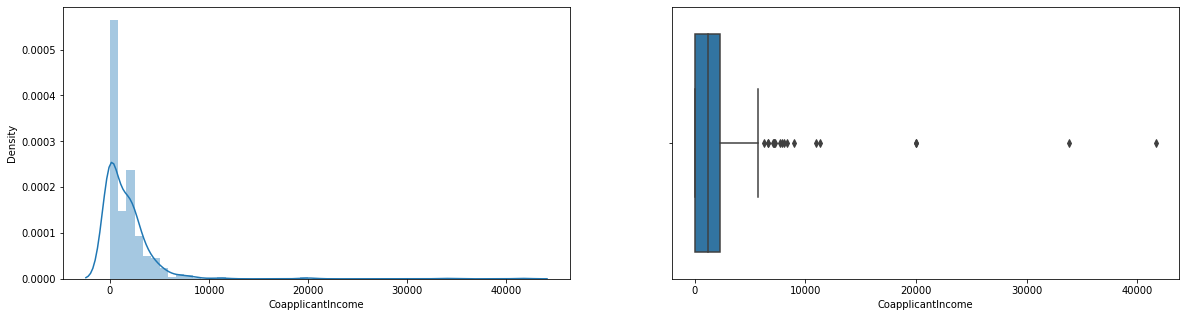

In [32]:
#coapllicant income
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(train['CoapplicantIncome'],ax=axes[0])
sns.boxplot(train['CoapplicantIncome'],ax=axes[1])
plt.show()

In [33]:
# similar distribution as aplicant's income and lotes of outlier 

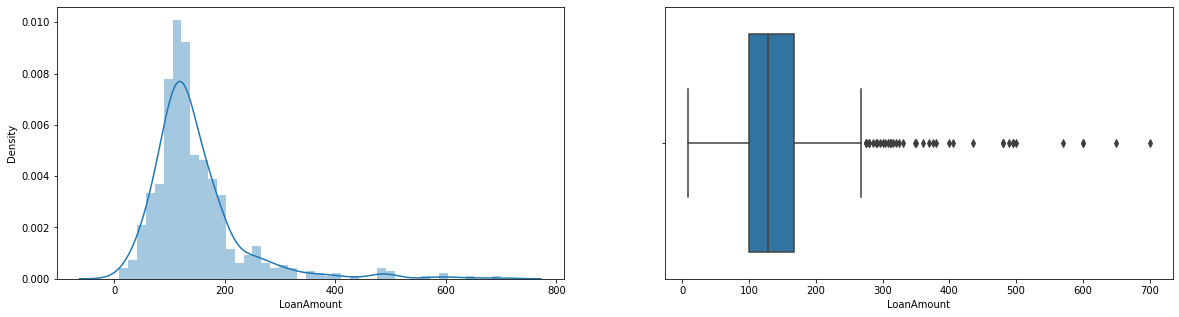

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(train['LoanAmount'],ax=axes[0])
sns.boxplot(train['LoanAmount'],ax=axes[1])
plt.show()

In [35]:
#left skewed data with outliers

# 2.Bivariate Analysis

##Categorical Independent Variable vs Target Variable

In [36]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])

In [37]:
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [38]:
Gender.sum(axis=1)

Gender
Female    112
Male      489
dtype: int64

In [39]:
Gender.div(Gender.sum(1).astype(float), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


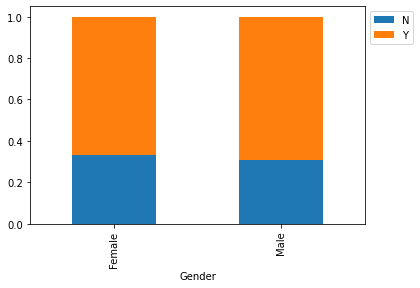

In [40]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(6,4))
plt.legend(bbox_to_anchor=(1,1),loc=2)

In [41]:
# It can conclude that proportion of male and female applicants is more or less same for both category

In [42]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

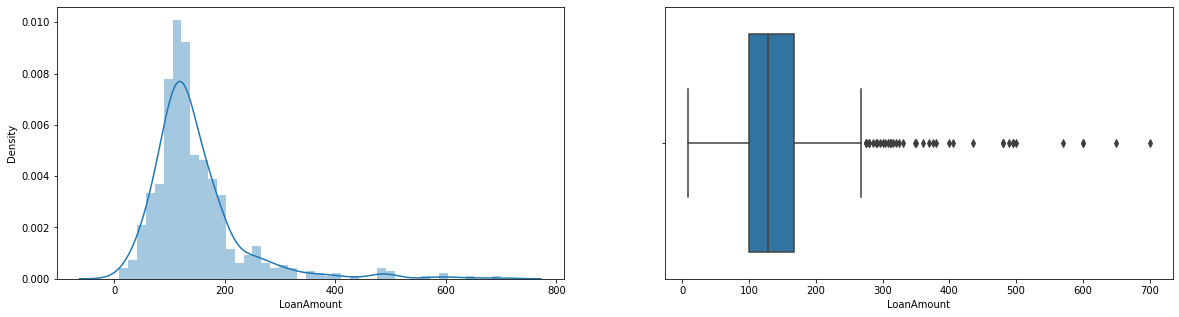

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
sns.distplot(train['LoanAmount'],ax=axes[0])
sns.boxplot(train['LoanAmount'],ax=axes[1])
plt.show()

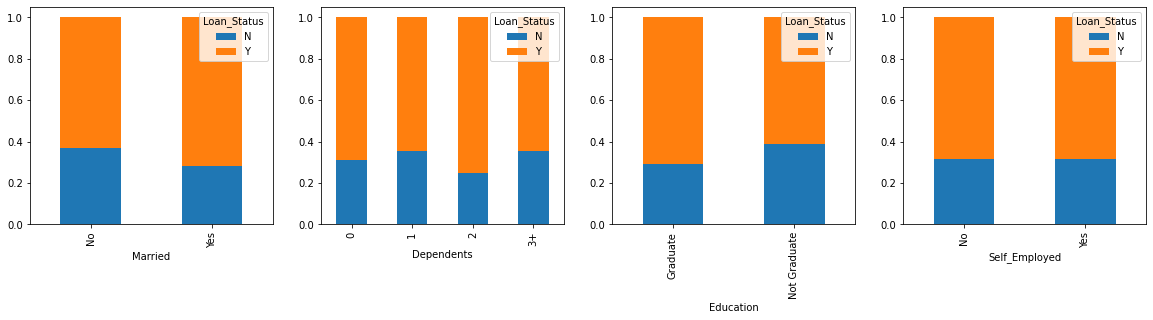

In [44]:
fig, axes = plt.subplots(1, 4, figsize=(20,4))
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=axes[0])

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=axes[1])

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=axes[2])

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=axes[3])

plt.show()

In [45]:
# 1) portion of married applicants is higher for approved loan
# 2) Distribution of application with 1 or 3+ dependents is similar across both category
# 3) Garduate are higher approved loan
# 4) from self_Employed vs loan_status also we can not conclude any rhing

In [46]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

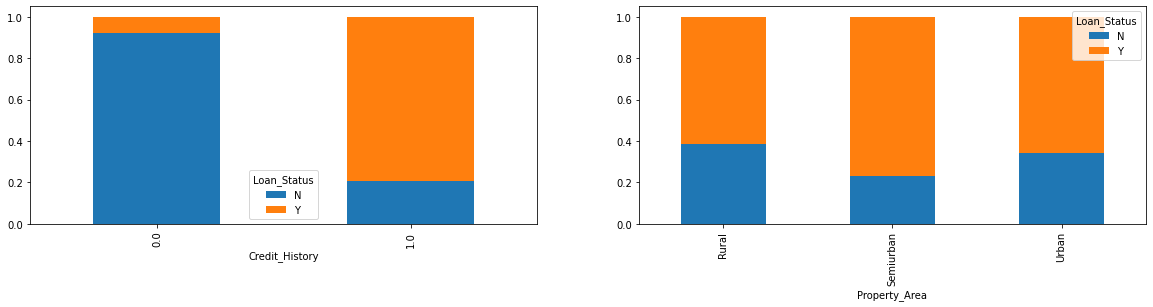

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20,4))
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=axes[0])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,ax=axes[1])
plt.show()

In [48]:
# its clearly indicate applicant have previous credit history has high chace to get loan
# Semiurban area has higher rate to apporved loan

##Numerical Independent Variable vs Target Variable

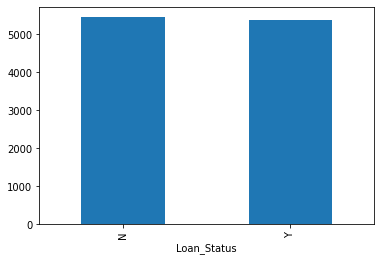

In [49]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [50]:
bins=[0,2500,4000,6000,8100]
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

In [51]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])

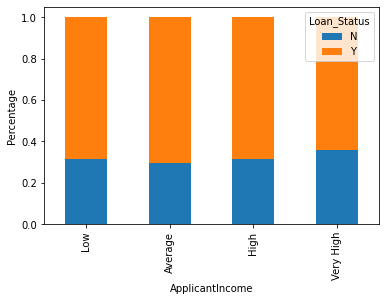

In [52]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

In [53]:
# all income people has nearly same chance of loan approval

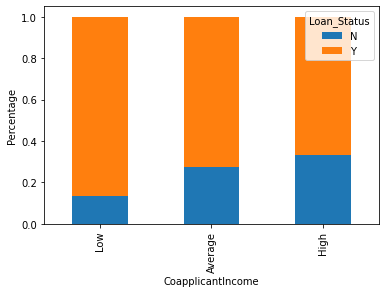

In [54]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

In [55]:
# by this it shows if coapplicant has low income ,has high probability to get loan 
# it seems to be not valid
# it might be most of applicant dosent have co_applicant so it consider as 0 

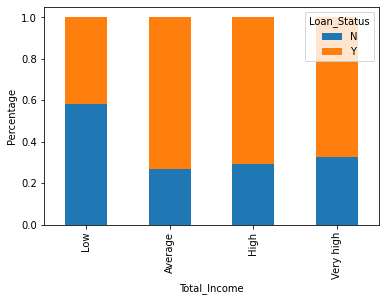

In [56]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

In [57]:
# low income applicant has low probability to loan get approved as ccompare to other

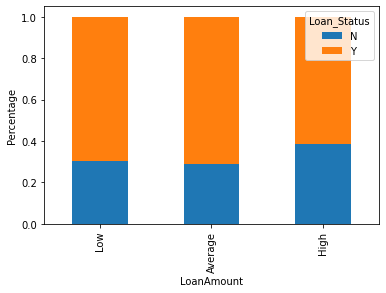

In [58]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [59]:
# low and average loan amount application has high chance to get as compare to high amount loan amount

In [60]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [61]:
# drop create new column for EDA
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],axis=1)
# replace some column value
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

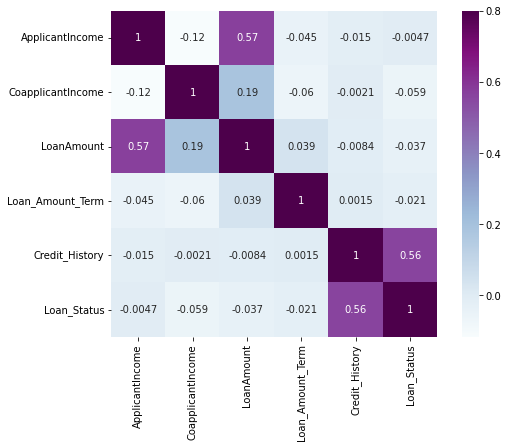

In [62]:
# f, ax = plt.subplots(figsize=(9,6))
plt.figure(figsize=(9,6))
sns.heatmap(train.corr(),vmax=.8,square=True,cmap="BuPu", annot = True)

In [ ]:
# most correlate variables are (ApplicantIncome-LoanAmount)
#Credit_History — Loan_Status
# LoanAmount is also correlated with CoapplicantIncome.

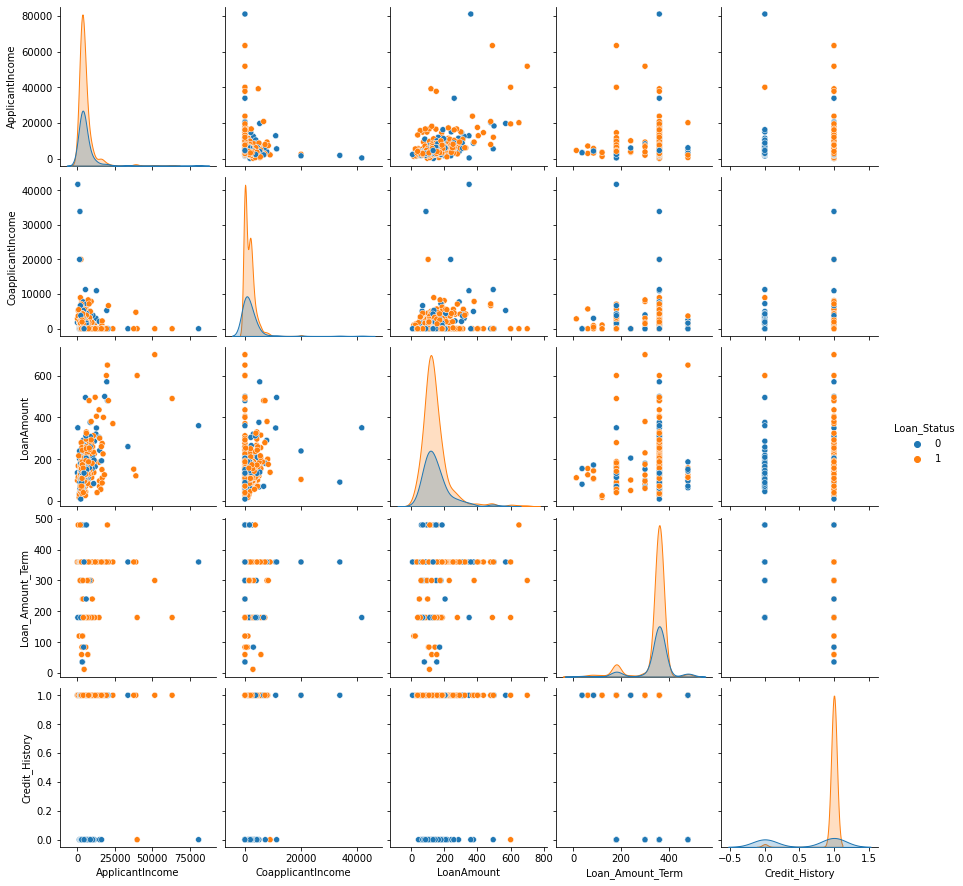

In [63]:
sns.pairplot(train,hue='Loan_Status')

#step 4: Feature Engineering

##Missing value imputation

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# there are misssing value in Gender,Married Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features

In [ ]:
# for numerical variable : Imputation using mean or median
# for categorical variable: imputation using mode

In [ ]:
# few missing values in GEnder,Married,Dependent,Creddit_History and Self_Employed feature so we can fill them using the mode of feature

In [ ]:
train["Gender"].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [ ]:
# for Loan_Amount_Term

train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# it can see most of time 360 is repeting so we will replace the missing value with 360

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
# for LoanAmout we use median as it has outlier 

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
#rechecking missing value
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# we can see all missing values are filled

In [ ]:
#for test dataset all sme will be apply
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


##Outlier Treatment

In [ ]:
# Loanamout by log Transformation

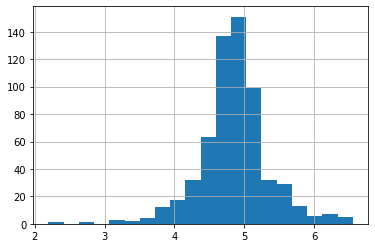

In [ ]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [ ]:
# now distributation looks much closer to normal 

# Step 5:-Model Building

##Model Building : Part I

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [ ]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
# split data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [ ]:
# model 
model = LogisticRegression()
#model train
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#find prediction
pred_cv = model.predict(x_cv)
# accuracy
accuracy_score(y_cv,pred_cv)

0.8216216216216217

In [ ]:
# so our prediction is almost 80 % accurate

In [ ]:
#make tset dataset
pred_test=model.predict(test)

In [ ]:
# submission file to submit solution
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/Data_set/sample_submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']


In [ ]:
#convert prediction into 'Y' and  'N'
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/output/logistic.csv')


##Logistic Regression using stratified k-folds cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8048780487804879

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.7886178861788617

5 of kfold 5 
accuracy_score 0.7950819672131147

 Mean Validation Accuracy 0.8012928162068507


In [ ]:
# The mean validation accuracy for this model turns out to be 0.80

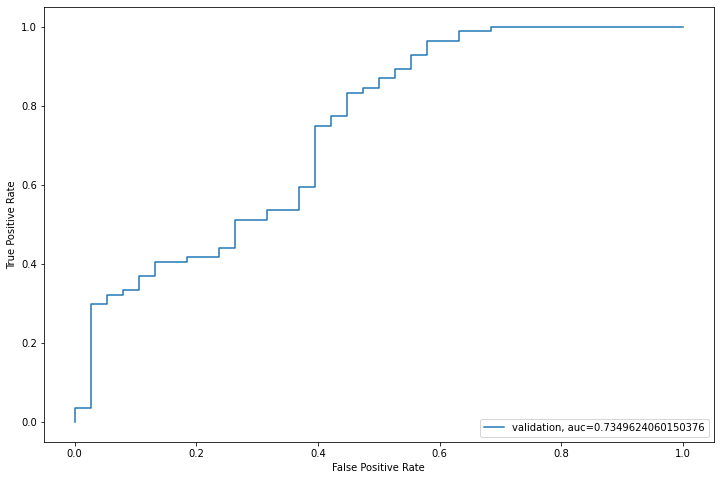

In [ ]:
# Roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# We got an auc value of 0.70

In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/output/Log1.csv')

##Feature Engineering

In [ ]:
# Total Income-combine the Applicant Income and Co-applicant Income. If the total income is high, the chances of loan approval might also be high.
# EMI — EMI is the monthly amount to be paid,high EMI’s might find it difficult to pay(calculate the EMI by taking the ratio of the loan amount with respect to the loan amount term)
# Balance Income —income left after the EMI has been paid


In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

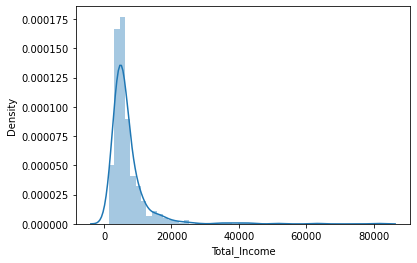

In [ ]:
sns.distplot(train['Total_Income'])

In [ ]:
# distribution is right skewed. So, let’s take the log transformation to make the distribution normal.

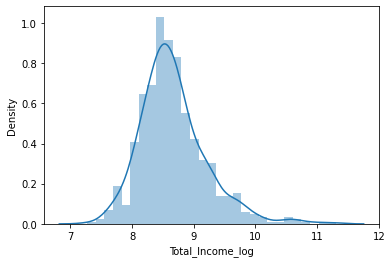

In [ ]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [ ]:
# Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided

In [ ]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

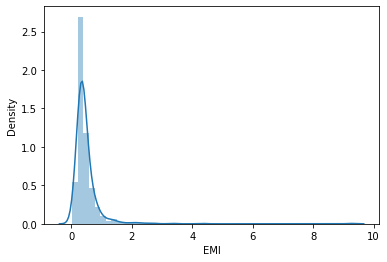

In [ ]:
sns.distplot(train['EMI'])

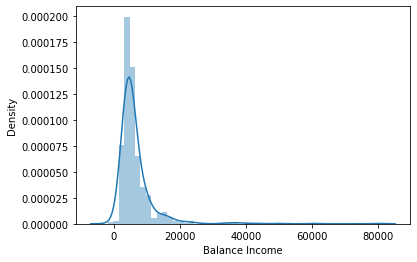

In [ ]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [ ]:
# now drop the variables which we used to create these new features

In [ ]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

##Model Building : Part II

In [ ]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

##Logistic Regression

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7886178861788617

2 of kfold 5 
accuracy_score 0.6910569105691057

3 of kfold 5 
accuracy_score 0.6666666666666666

4 of kfold 5 
accuracy_score 0.7967479674796748

5 of kfold 5 
accuracy_score 0.680327868852459

 Mean Validation Accuracy 0.7246834599493536


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/output/Log2.csv')

##Decision Tree

In [ ]:
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7398373983739838

2 of kfold 5 
accuracy_score 0.6991869918699187

3 of kfold 5 
accuracy_score 0.7560975609756098

4 of kfold 5 
accuracy_score 0.7073170731707317

5 of kfold 5 
accuracy_score 0.6721311475409836

 Mean Validation Accuracy 0.7149140343862455


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']

In [ ]:

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/output/DecisionTree.csv')

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8292682926829268

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.7723577235772358

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.7947221111555378


##Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [ ]:
# Create Best Model 
best_model = grid_search.best_estimator_

In [ ]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = best_model
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8211382113821138

2 of kfold 5 
accuracy_score 0.8373983739837398

3 of kfold 5 
accuracy_score 0.7804878048780488

4 of kfold 5 
accuracy_score 0.7804878048780488

5 of kfold 5 
accuracy_score 0.7868852459016393

 Mean Validation Accuracy 0.8012794882047182


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/output/RandomForest.csv')

In [ ]:
#  feature importance now, i.e. which features are most important for this problem

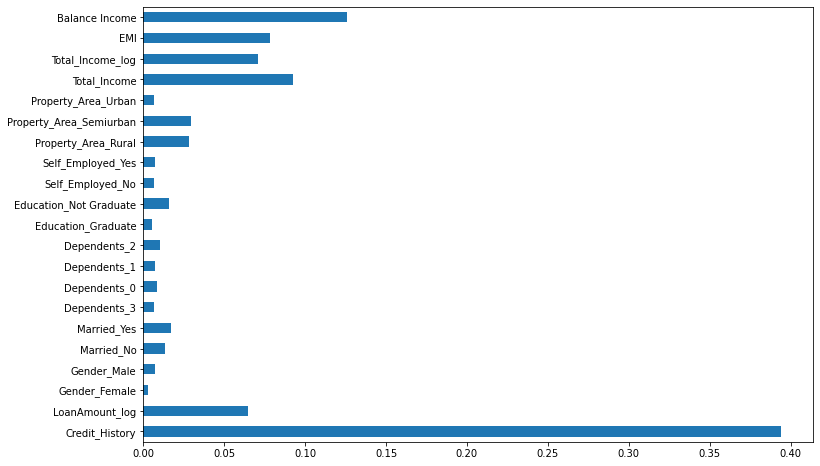

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [ ]:
# that Credit_History is the most important feature followed by Balance Income, Total Income, EMI. So, feature engineering helped us in predicting our target variable

##XGBOOST

In [ ]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = XGBClassifier(n_estimators=50, max_depth=4)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.7963881114220979


In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_orignal['Loan_ID']

In [ ]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('/content/drive/MyDrive/Colab Notebooks/DSCT/Machine Learning/Loan Eligibility using Machine Learning/output/xgboost.csv')